In [71]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.ensemble import ExtraTreesRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, make_scorer, mean_absolute_error, r2_score


In [72]:
sales = pd.read_csv(r"C:\Users\pc\Desktop\Data Science Folder\Retail1\sales data-set.csv")

stores = pd.read_csv(r"C:\Users\pc\Desktop\Data Science Folder\Retail1\stores data-set.csv")

features = pd.read_csv(r"C:\Users\pc\Desktop\Data Science Folder\Retail1\Features data set.csv")

# change date format from j/m/a to a-m-j


In [73]:

"""
change date format from j/m/a to a-m-j
"""

features['Date'] = pd.to_datetime(features['Date'])
sales['Date'] = pd.to_datetime(sales['Date'])

# on peut specifier df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")


# Show one column of a Dataframe

In [74]:
print(sales[0:1].Date, '\n', sales[-1:].Date)

0   2010-05-02
Name: Date, dtype: datetime64[ns] 
 421569   2012-10-26
Name: Date, dtype: datetime64[ns]


In [75]:
print("sales", '\n', sales.head() )
print( "feautures", '\n', features.head())
print( "stores", '\n', stores.head() )

sales 
    Store  Dept       Date  Weekly_Sales  IsHoliday
0      1     1 2010-05-02      24924.50      False
1      1     1 2010-12-02      46039.49       True
2      1     1 2010-02-19      41595.55      False
3      1     1 2010-02-26      19403.54      False
4      1     1 2010-05-03      21827.90      False
feautures 
    Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0      1 2010-05-02        42.31       2.572        NaN        NaN        NaN   
1      1 2010-12-02        38.51       2.548        NaN        NaN        NaN   
2      1 2010-02-19        39.93       2.514        NaN        NaN        NaN   
3      1 2010-02-26        46.63       2.561        NaN        NaN        NaN   
4      1 2010-05-03        46.50       2.625        NaN        NaN        NaN   

   MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN  211.242170         8.106       True 

# Merge two dataframes (beware how='left' or how='right' is important) in this example 2013 date will not be present

In [76]:
df= pd.merge(sales,features, on=['Store','Date', 'IsHoliday'], how='left')
#left means preserve all data of sales, merging will be completed with missing values from features
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-05-02,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-12-02,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-05-03,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106
5,1,1,2010-12-03,21043.39,False,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106
6,1,1,2010-03-19,22136.64,False,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106
7,1,1,2010-03-26,26229.21,False,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106
8,1,1,2010-02-04,57258.43,False,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808
9,1,1,2010-09-04,42960.91,False,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808


In [77]:
df = pd.merge(df, stores, on="Store", how='left')



In [78]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-05-02,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-12-02,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-05-03,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315
5,1,1,2010-12-03,21043.39,False,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,A,151315
6,1,1,2010-03-19,22136.64,False,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,A,151315
7,1,1,2010-03-26,26229.21,False,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,A,151315
8,1,1,2010-02-04,57258.43,False,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,A,151315
9,1,1,2010-09-04,42960.91,False,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,A,151315


# know how many duplicates in a row

In [79]:
df['Date'].duplicated(keep='first').sum()


421427

# fill Nan values 

In [80]:
df=df.fillna(0)
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-05-02,24924.50,False,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,A,151315
1,1,1,2010-12-02,46039.49,True,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,A,151315
4,1,1,2010-05-03,21827.90,False,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,A,151315
5,1,1,2010-12-03,21043.39,False,57.79,2.667,0.00,0.00,0.00,0.00,0.00,211.380643,8.106,A,151315
6,1,1,2010-03-19,22136.64,False,54.58,2.720,0.00,0.00,0.00,0.00,0.00,211.215635,8.106,A,151315
7,1,1,2010-03-26,26229.21,False,51.45,2.732,0.00,0.00,0.00,0.00,0.00,211.018042,8.106,A,151315
8,1,1,2010-02-04,57258.43,False,62.27,2.719,0.00,0.00,0.00,0.00,0.00,210.820450,7.808,A,151315
9,1,1,2010-09-04,42960.91,False,65.86,2.770,0.00,0.00,0.00,0.00,0.00,210.622857,7.808,A,151315


# change numeric values of a whole column

In [81]:
df['Temperature'] = (df['Temperature']- 32) * 5./9.

# change Letter values to numeric ones

In [82]:
types_encoded, types =df['Type'].factorize()

#types_encoded is the new value
# types is the same old one
# whole result is a tuple

df['Type'] = types_encoded

In [83]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-05-02,24924.50,False,5.727778,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315
1,1,1,2010-12-02,46039.49,True,3.616667,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,0,151315
2,1,1,2010-02-19,41595.55,False,4.405556,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0,151315
3,1,1,2010-02-26,19403.54,False,8.127778,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,0,151315
4,1,1,2010-05-03,21827.90,False,8.055556,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,0,151315


# to see count, mean, min, max ...

In [84]:
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,15.605588,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,0.589912,136727.915739
std,12.785297,30.492054,22711.183519,10.248851,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,0.666337,60980.583328
min,1.000000,1.000000,-4988.940000,-18.922222,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,0.000000,34875.000000
25%,11.000000,18.000000,2079.650000,8.155556,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,0.000000,93638.000000
50%,22.000000,37.000000,7612.030000,16.716667,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,0.000000,140167.000000
75%,33.000000,74.000000,20205.852500,23.488889,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,1.000000,202505.000000
max,45.000000,99.000000,693099.360000,37.855556,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,2.000000,219622.000000


# Visualization: see values of different columns

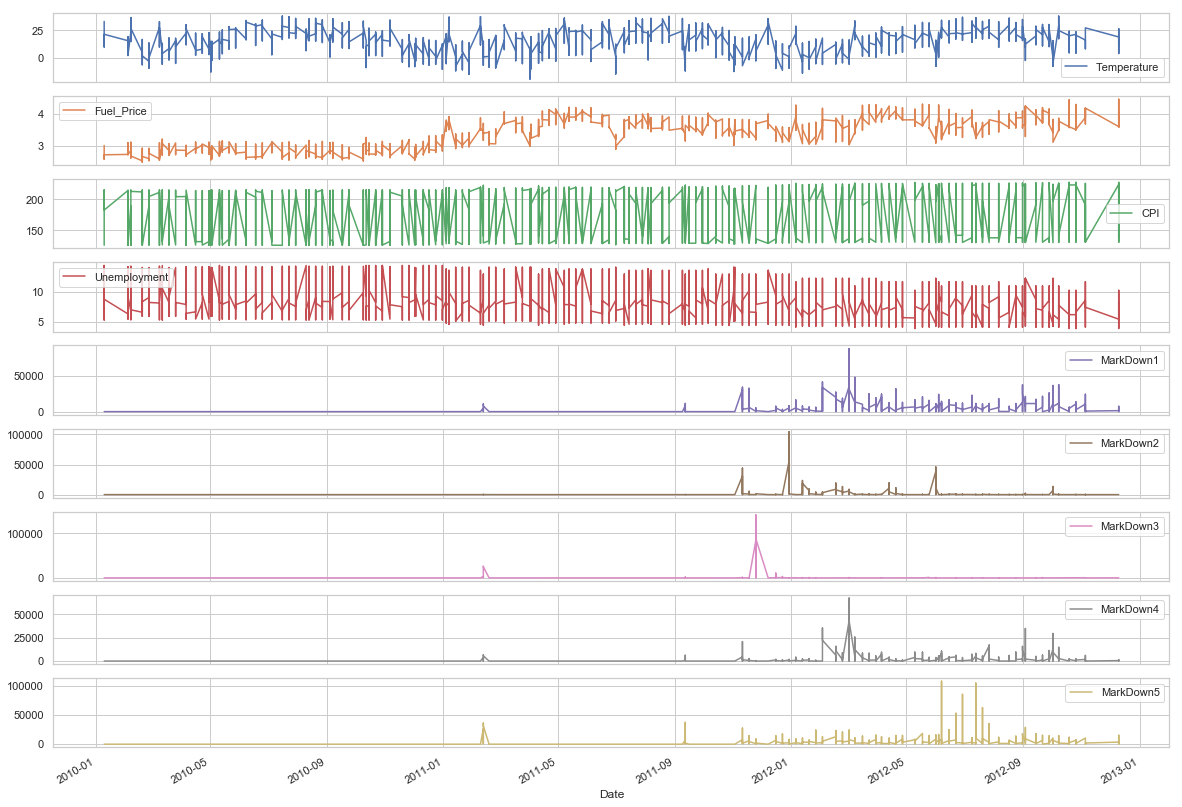

In [85]:
df[['Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 
    'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].plot(x='Date', subplots=True, figsize=(20,15))
plt.show()

# Have the sum of values of one column (key,value) in a DataFrame

In [86]:
df_average_sales_week = df.groupby(by=['Date'], as_index=False)['Weekly_Sales'].sum()
print( df_average_sales_week.head() )
print( df_average_sales_week['Date'].duplicated(keep='first').sum() )


        Date  Weekly_Sales
0 2010-01-10   42239875.87
1 2010-02-04   50423831.26
2 2010-02-07   48917484.50
3 2010-02-19   48276993.78
4 2010-02-26   43968571.13
0


### Notice that this is different than the previous method: it gives series 

In [87]:
test = df.groupby(by=['Date'], as_index=False).sum()['Weekly_Sales']
test


0      42239875.87
1      50423831.26
2      48917484.50
3      48276993.78
4      43968571.13
5      47194257.61
6      49909027.88
7      44988974.64
8      44133961.05
9      50188543.12
10     45183667.08
11     44734452.56
12     43705126.71
13     49750740.50
14     46871470.30
15     45781981.89
16     45330080.20
17     45120108.06
18     47757502.56
19     48204999.12
20     47622046.23
21     46609036.29
22     48503243.52
23     46243899.58
24     44888849.11
25     44630363.42
26     45102974.23
27     46464418.41
28     47060952.92
29     45909740.44
          ...     
113    46629261.41
114    45072529.78
115    43716798.89
116    47566639.31
117    46823939.22
118    47892463.31
119    44955421.95
120    53502315.87
121    51253021.88
122    48412110.70
123    47668284.97
124    46597112.12
125    48330059.31
126    46099732.10
127    46059543.45
128    44097154.97
129    49651171.78
130    47354452.05
131    47447323.60
132    47159639.43
133    47480454.11
134    44226

# sort a column in a DataFrame --> giving a DataFrame that is sorted on a specific column ( ascending or descending order )

In [88]:
df_average_sales = df_average_sales_week.sort_values('Weekly_Sales', ascending=False)
df_average_sales

,Date,Weekly_Sales
46,2010-12-24,80931415.60
98,2011-12-23,76998241.31
95,2011-11-25,66593605.26
41,2010-11-26,65821003.24
45,2010-12-17,61820799.85
97,2011-12-16,60085695.94
35,2010-10-12,55666770.39
83,2011-09-12,55561147.70
120,2012-06-04,53502315.87
121,2012-06-07,51253021.88


# Representation of a sorted column depending on an other column -> it doesn't matter if it is sorted or not!

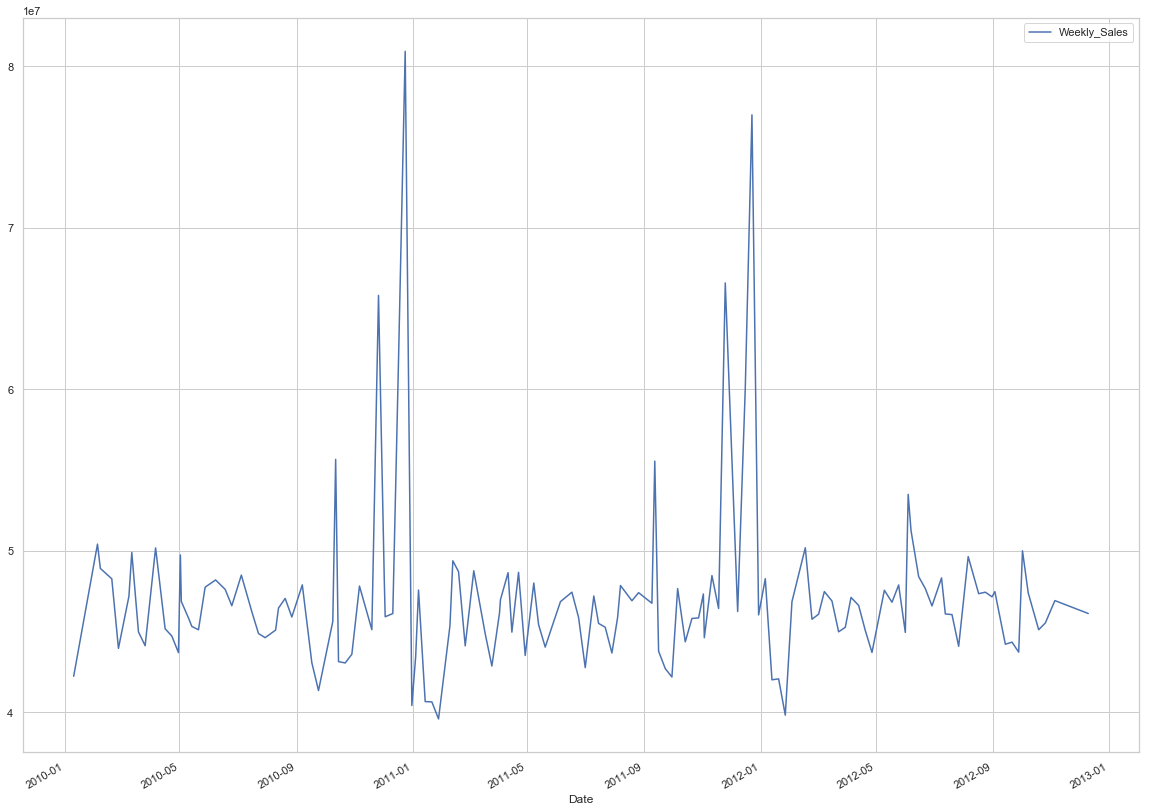

In [89]:
df_average_sales.plot(x='Date', subplots=True, figsize=(20,15))
plt.show()

# reverse a DataFrame

In [90]:
test = df_average_sales[::-1]
print( df_average_sales )
print( test)

#df_average_sales didn't change

          Date  Weekly_Sales
46  2010-12-24   80931415.60
98  2011-12-23   76998241.31
95  2011-11-25   66593605.26
41  2010-11-26   65821003.24
45  2010-12-17   61820799.85
97  2011-12-16   60085695.94
35  2010-10-12   55666770.39
83  2011-09-12   55561147.70
120 2012-06-04   53502315.87
121 2012-06-07   51253021.88
1   2010-02-04   50423831.26
105 2012-02-17   50197056.96
9   2010-04-06   50188543.12
137 2012-10-02   50009407.92
6   2010-03-12   49909027.88
13  2010-05-02   49750740.50
129 2012-08-06   49651171.78
54  2011-02-12   49390556.49
2   2010-02-07   48917484.50
57  2011-03-06   48771994.18
55  2011-02-18   48716164.12
64  2011-04-22   48676692.06
62  2011-04-11   48655544.30
22  2010-07-05   48503243.52
93  2011-11-11   48474224.75
122 2012-06-15   48412110.70
42  2010-12-02   48336677.63
125 2012-07-09   48330059.31
100 2012-01-06   48281649.72
3   2010-02-19   48276993.78
..         ...           ...
134 2012-09-14   44226038.65
8   2010-03-26   44133961.05
56  2011-02-25

# change the index of the DataFrame

In [91]:
ts = df_average_sales_week.set_index('Date')


# verify if there are negative values

In [92]:
df["Weekly_Sales"].describe()

count    421570.000000
mean      15981.258123
std       22711.183519
min       -4988.940000
25%        2079.650000
50%        7612.030000
75%       20205.852500
max      693099.360000
Name: Weekly_Sales, dtype: float64

# make a boolean column

In [93]:
df["IsReturn"] = ((df["Weekly_Sales"]<0))
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,IsReturn
0,1,1,2010-05-02,24924.50,False,5.727778,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,0,151315,False
1,1,1,2010-12-02,46039.49,True,3.616667,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,0,151315,False
2,1,1,2010-02-19,41595.55,False,4.405556,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,0,151315,False
3,1,1,2010-02-26,19403.54,False,8.127778,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,0,151315,False
4,1,1,2010-05-03,21827.90,False,8.055556,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,0,151315,False
5,1,1,2010-12-03,21043.39,False,14.327778,2.667,0.00,0.00,0.00,0.00,0.00,211.380643,8.106,0,151315,False
6,1,1,2010-03-19,22136.64,False,12.544444,2.720,0.00,0.00,0.00,0.00,0.00,211.215635,8.106,0,151315,False
7,1,1,2010-03-26,26229.21,False,10.805556,2.732,0.00,0.00,0.00,0.00,0.00,211.018042,8.106,0,151315,False
8,1,1,2010-02-04,57258.43,False,16.816667,2.719,0.00,0.00,0.00,0.00,0.00,210.820450,7.808,0,151315,False
9,1,1,2010-09-04,42960.91,False,18.811111,2.770,0.00,0.00,0.00,0.00,0.00,210.622857,7.808,0,151315,False


# drop columns

In [94]:
df = df.drop(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], axis = 1)
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,IsReturn
0,1,1,2010-05-02,24924.50,False,5.727778,2.572,211.096358,8.106,0,151315,False
1,1,1,2010-12-02,46039.49,True,3.616667,2.548,211.242170,8.106,0,151315,False
2,1,1,2010-02-19,41595.55,False,4.405556,2.514,211.289143,8.106,0,151315,False
3,1,1,2010-02-26,19403.54,False,8.127778,2.561,211.319643,8.106,0,151315,False
4,1,1,2010-05-03,21827.90,False,8.055556,2.625,211.350143,8.106,0,151315,False
5,1,1,2010-12-03,21043.39,False,14.327778,2.667,211.380643,8.106,0,151315,False
6,1,1,2010-03-19,22136.64,False,12.544444,2.720,211.215635,8.106,0,151315,False
7,1,1,2010-03-26,26229.21,False,10.805556,2.732,211.018042,8.106,0,151315,False
8,1,1,2010-02-04,57258.43,False,16.816667,2.719,210.820450,7.808,0,151315,False
9,1,1,2010-09-04,42960.91,False,18.811111,2.770,210.622857,7.808,0,151315,False


In [95]:
dfSales = df.copy()
dfSales


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,IsReturn
0,1,1,2010-05-02,24924.50,False,5.727778,2.572,211.096358,8.106,0,151315,False
1,1,1,2010-12-02,46039.49,True,3.616667,2.548,211.242170,8.106,0,151315,False
2,1,1,2010-02-19,41595.55,False,4.405556,2.514,211.289143,8.106,0,151315,False
3,1,1,2010-02-26,19403.54,False,8.127778,2.561,211.319643,8.106,0,151315,False
4,1,1,2010-05-03,21827.90,False,8.055556,2.625,211.350143,8.106,0,151315,False
5,1,1,2010-12-03,21043.39,False,14.327778,2.667,211.380643,8.106,0,151315,False
6,1,1,2010-03-19,22136.64,False,12.544444,2.720,211.215635,8.106,0,151315,False
7,1,1,2010-03-26,26229.21,False,10.805556,2.732,211.018042,8.106,0,151315,False
8,1,1,2010-02-04,57258.43,False,16.816667,2.719,210.820450,7.808,0,151315,False
9,1,1,2010-09-04,42960.91,False,18.811111,2.770,210.622857,7.808,0,151315,False


# add a column

In [96]:
df['IsHolidayInt']  = [ int(x) for x in df['IsHoliday']] 
df


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,IsReturn,IsHolidayInt
0,1,1,2010-05-02,24924.50,False,5.727778,2.572,211.096358,8.106,0,151315,False,0
1,1,1,2010-12-02,46039.49,True,3.616667,2.548,211.242170,8.106,0,151315,False,1
2,1,1,2010-02-19,41595.55,False,4.405556,2.514,211.289143,8.106,0,151315,False,0
3,1,1,2010-02-26,19403.54,False,8.127778,2.561,211.319643,8.106,0,151315,False,0
4,1,1,2010-05-03,21827.90,False,8.055556,2.625,211.350143,8.106,0,151315,False,0
5,1,1,2010-12-03,21043.39,False,14.327778,2.667,211.380643,8.106,0,151315,False,0
6,1,1,2010-03-19,22136.64,False,12.544444,2.720,211.215635,8.106,0,151315,False,0
7,1,1,2010-03-26,26229.21,False,10.805556,2.732,211.018042,8.106,0,151315,False,0
8,1,1,2010-02-04,57258.43,False,16.816667,2.719,210.820450,7.808,0,151315,False,0
9,1,1,2010-09-04,42960.91,False,18.811111,2.770,210.622857,7.808,0,151315,False,0


# correlation matrix and its representation

In [97]:
corrmat = dfSales[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Type', 'Size', 'Dept']].corr()
corrmat

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Dept
Weekly_Sales,1.000000,-0.002312,-0.000120,-0.020921,-0.025864,-0.182242,0.243828,0.148032
Temperature,-0.002312,1.000000,0.143859,0.182112,0.096730,0.042981,-0.058313,0.004437
Fuel_Price,-0.000120,0.143859,1.000000,-0.164210,-0.033853,0.029687,0.003361,0.003572
CPI,-0.020921,0.182112,-0.164210,1.000000,-0.299953,-0.065812,-0.003314,-0.007477
Unemployment,-0.025864,0.096730,-0.033853,-0.299953,1.000000,0.148720,-0.068238,0.007837
Type,-0.182242,0.042981,0.029687,-0.065812,0.148720,1.000000,-0.811593,0.003708
Size,0.243828,-0.058313,0.003361,-0.003314,-0.068238,-0.811593,1.000000,-0.002966
Dept,0.148032,0.004437,0.003572,-0.007477,0.007837,0.003708,-0.002966,1.000000


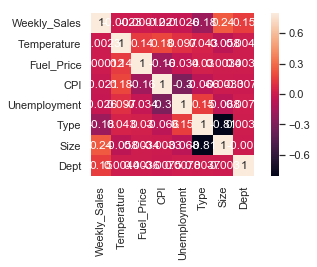

In [98]:
f, ax = plt.subplots(figsize=(6,3))
# f , ax must been writtenb
sns.heatmap(corrmat, vmax=.8, square=True, annot=True);


# divide date

In [99]:
dfSales['year'] = dfSales['Date'].dt.year 
dfSales['week'] = dfSales['Date'].dt.week
# column that have year*100+ week
dfSales['yearweek'] = dfSales['year']*100 + dfSales['week']
dfSales

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,IsReturn,year,week,yearweek
0,1,1,2010-05-02,24924.50,False,5.727778,2.572,211.096358,8.106,0,151315,False,2010,17,201017
1,1,1,2010-12-02,46039.49,True,3.616667,2.548,211.242170,8.106,0,151315,False,2010,48,201048
2,1,1,2010-02-19,41595.55,False,4.405556,2.514,211.289143,8.106,0,151315,False,2010,7,201007
3,1,1,2010-02-26,19403.54,False,8.127778,2.561,211.319643,8.106,0,151315,False,2010,8,201008
4,1,1,2010-05-03,21827.90,False,8.055556,2.625,211.350143,8.106,0,151315,False,2010,18,201018
5,1,1,2010-12-03,21043.39,False,14.327778,2.667,211.380643,8.106,0,151315,False,2010,48,201048
6,1,1,2010-03-19,22136.64,False,12.544444,2.720,211.215635,8.106,0,151315,False,2010,11,201011
7,1,1,2010-03-26,26229.21,False,10.805556,2.732,211.018042,8.106,0,151315,False,2010,12,201012
8,1,1,2010-02-04,57258.43,False,16.816667,2.719,210.820450,7.808,0,151315,False,2010,5,201005
9,1,1,2010-09-04,42960.91,False,18.811111,2.770,210.622857,7.808,0,151315,False,2010,35,201035


In [100]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,IsReturn,IsHolidayInt
0,1,1,2010-05-02,24924.50,False,5.727778,2.572,211.096358,8.106,0,151315,False,0
1,1,1,2010-12-02,46039.49,True,3.616667,2.548,211.242170,8.106,0,151315,False,1
2,1,1,2010-02-19,41595.55,False,4.405556,2.514,211.289143,8.106,0,151315,False,0
3,1,1,2010-02-26,19403.54,False,8.127778,2.561,211.319643,8.106,0,151315,False,0
4,1,1,2010-05-03,21827.90,False,8.055556,2.625,211.350143,8.106,0,151315,False,0
5,1,1,2010-12-03,21043.39,False,14.327778,2.667,211.380643,8.106,0,151315,False,0
6,1,1,2010-03-19,22136.64,False,12.544444,2.720,211.215635,8.106,0,151315,False,0
7,1,1,2010-03-26,26229.21,False,10.805556,2.732,211.018042,8.106,0,151315,False,0
8,1,1,2010-02-04,57258.43,False,16.816667,2.719,210.820450,7.808,0,151315,False,0
9,1,1,2010-09-04,42960.91,False,18.811111,2.770,210.622857,7.808,0,151315,False,0


# graphic work on departments

In [101]:
dept_sales = dfSales.groupby(by = ['Dept', 'year'], as_index=False)["Weekly_Sales"].sum()
# dans ce cas index reste 
dept_sales.head()

,Dept,year,Weekly_Sales
0,1,2010,4.284353e+07
1,1,2011,4.534931e+07
2,1,2012,3.544593e+07
3,2,2010,9.405293e+07
4,2,2011,1.015053e+08


## get the biggest or lowest values of a column in a DataFrame

In [102]:
top_depts = dept_sales.nlargest(30, 'Weekly_Sales')
top_depts.head()
bottom_depts = dept_sales.nsmallest(30, 'Weekly_Sales')
bottom_depts.head()

,Dept,year,Weekly_Sales
136,47,2011,-3742.29
135,47,2010,-2315.95
123,43,2010,1.75
112,39,2011,1.98
125,43,2012,5.50


# Factor plot

C:\Users\pc\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\pc\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


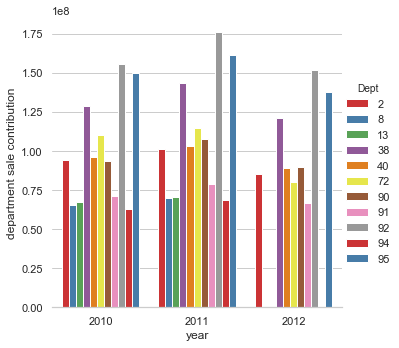

In [103]:
sns.set(style="whitegrid")


g = sns.factorplot(x="year", y="Weekly_Sales", hue="Dept", data=top_depts, size=5, kind="bar", palette="Set1")

g.despine(left=True)
g.set_ylabels("department sale contribution")


C:\Users\pc\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\pc\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


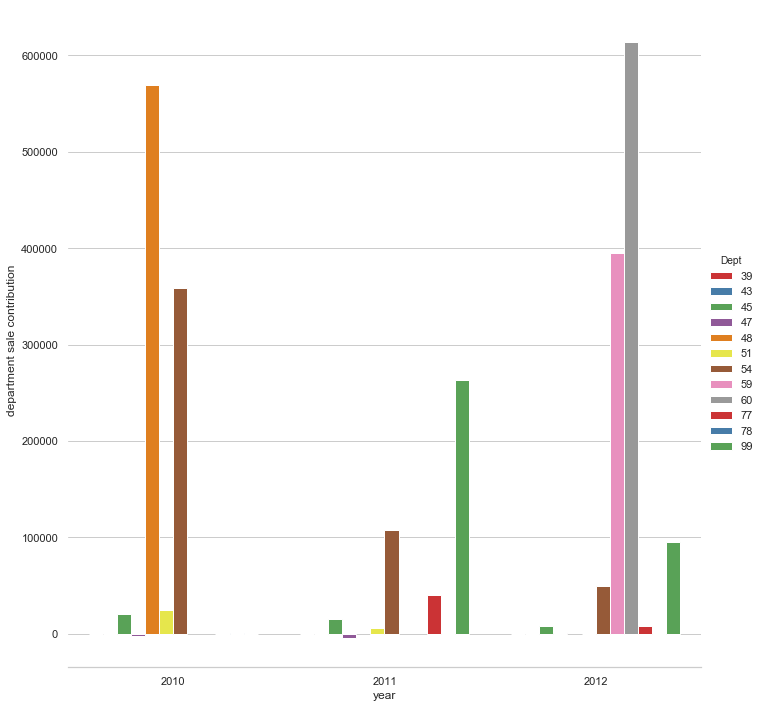

In [104]:
sns.set(style="whitegrid")


g = sns.factorplot(x="year", y="Weekly_Sales", hue="Dept", data=bottom_depts, size=10, kind="bar", palette="Set1")

g.despine(left=True)
g.set_ylabels("department sale contribution")

# prediction test train split

# linear regression

In [108]:
train1 = dfSales.loc[dfSales['year'] != 2012]
test1 = dfSales.loc[dfSales['year'] == 2012]

print( train1.columns )


featureset1 = ['Store', 'Dept', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday', 'Size']

x_train1 = train1[featureset1]
y_train1 = train1['Weekly_Sales']

x_test1 = test1[featureset1]
y_test1 = test1['Weekly_Sales']

lr = LinearRegression()
lr.fit(x_train1, y_train1)

y_pred1 = lr.predict(x_test1) #gives array
y_train_pred1 = lr.predict(x_train1)

print("linear regression Score:", lr.score(x_test1, y_test1))

print("linear regression Score:", lr.score(x_train1, y_train1))

from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_train_pred1, y_train1))
print('rmse of train : ' , rmse)

rmse = np.sqrt(mean_squared_error(y_pred1, y_test1))
print('rmse of train : ' , rmse)




Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Type', 'Size', 'IsReturn', 'year',
       'week', 'yearweek'],
      dtype='object')
linear regression Score: 0.09102367619240503
linear regression Score: 0.08240862484480693
rmse of train :  21994.820143723642
rmse of train :  21089.69841411154


In [ ]:
tf = pd.DataFrame({'Actual': y_train_pred1, 'Predicted': y_train1.values})

tf

In [ ]:
# The coefficients
print('Coefficients: \n', lr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test1, y_pred1))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test1, y_pred1))

# boxplot

In [ ]:
# boxplot on a series!
y_train1.plot.box()

#boxplot on a dataframe pandas.DataFrame.boxplot¶

# visualize the error

In [ ]:
plt.figure(figsize=(6,3))

plt.scatter(y_train_pred1, y_train_pred1 - y_train1, c = "blue", marker = "s", label = "Training data")

plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")

plt.hlines(y= 0, xmin = 0, xmax = 40000, color = "red") # horizontal ligne

plt.scatter(y_pred1, y_pred1 - y_test1, c = "lightgreen", marker = "s", label = "Validation data")


plt.show()





# visualize the values

In [ ]:
plt.figure(figsize=(6,3))

plt.scatter(y_train_pred1, y_train1, c = "blue", marker = "s", label = "Training data")

plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel(" real values")
plt.legend(loc = "upper left")

x = np.linspace(0, 50000, 10)
y = x
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')

plt.scatter(y_pred1, y_test1, c = "lightgreen", marker = "s", label = "Validation data")


plt.show()

In [ ]:
# droite affine

x = np.linspace(-50000, 700000, 10)
y = x
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')

plt.show()



# ExtraTreesRegressor

In [109]:
train2 = dfSales.loc[dfSales['year'] != 2012]
test2 = dfSales.loc[dfSales['year'] == 2012]

featureset2 = ['Store', 'Dept', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday', 'Size']


x_train2 = train2[featureset2]
y_train2 = train2['Weekly_Sales']

x_test2 = test2[featureset2]
y_test2 = test2['Weekly_Sales']

etr = ExtraTreesRegressor(n_estimators=200)
etr.fit(x_train2, y_train2)

y_pred2 = etr.predict(x_test2)

y_train_pred2 = etr.predict(x_train2)

print("ExtraTreeRegressor Score:", etr.score(x_test2, y_test2))
print("ExtraTreeRegressor Score:", etr.score(x_train2, y_train2))

print("Mean squared error: %.2f" %
       np.mean((y_test2 - y_pred2) ** 2))

from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_train_pred2, y_train2))
print('rmse of train : ' , rmse)

rmse = np.sqrt(mean_squared_error(y_pred2, y_test2))
print('rmse of train : ' , rmse)

ExtraTreeRegressor Score: 0.8923013042154575
ExtraTreeRegressor Score: 0.999999999969652
Mean squared error: 52698543.41
rmse of train :  0.12649127292957285
rmse of train :  7259.3762409500705


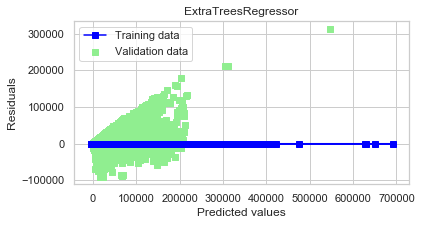

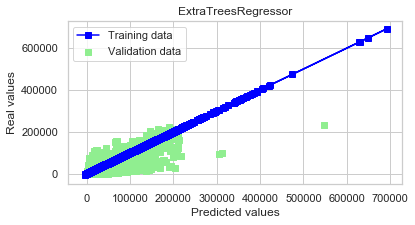

In [181]:
# Plot residuals
plt.figure(figsize=(6,3))
plt.plot(y_train_pred2, y_train_pred2 - y_train2, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_pred2, y_pred2 - y_test2, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("ExtraTreesRegressor")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.show()

# Plot predictions
plt.figure(figsize=(6,3))
plt.plot(y_train_pred2, y_train2, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_pred2, y_test2, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("ExtraTreesRegressor")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.show()

# 2013

In [166]:
features['year'] = features['Date'].dt.year 
features['week'] = features['Date'].dt.week
features1 = features.loc[ features['year']==2013]
features1.head()
# ou
#features2 = features.loc[ features['Date'].dt.year == 2013]
#features2

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,year,week
152,1,2013-04-01,41.73,3.161,1214.08,25366.33,15.01,72.36,3940.02,224.080983,6.525,False,2013,14
153,1,2013-11-01,50.32,3.243,6520.24,16134.60,12.17,774.55,4001.25,224.201552,6.525,False,2013,44
154,1,2013-01-18,42.92,3.237,3772.69,3559.46,3.88,246.62,1900.40,224.235813,6.525,False,2013,3
155,1,2013-01-25,53.37,3.227,965.89,1097.91,0.10,225.36,1831.88,224.235552,6.525,False,2013,4
156,1,2013-01-02,56.46,3.244,9290.91,1359.90,265.00,20657.82,972.61,224.235290,6.525,False,2013,1


In [167]:
rf = pd.merge( features1, stores, how='left', on=['Store'])
rf

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,year,week,Type,Size
0,1,2013-04-01,41.73,3.161,1214.08,25366.33,15.01,72.36,3940.02,224.080983,6.525,False,2013,14,A,151315
1,1,2013-11-01,50.32,3.243,6520.24,16134.60,12.17,774.55,4001.25,224.201552,6.525,False,2013,44,A,151315
2,1,2013-01-18,42.92,3.237,3772.69,3559.46,3.88,246.62,1900.40,224.235813,6.525,False,2013,3,A,151315
3,1,2013-01-25,53.37,3.227,965.89,1097.91,0.10,225.36,1831.88,224.235552,6.525,False,2013,4,A,151315
4,1,2013-01-02,56.46,3.244,9290.91,1359.90,265.00,20657.82,972.61,224.235290,6.525,False,2013,1,A,151315
5,1,2013-08-02,56.67,3.417,32355.16,729.80,280.89,20426.61,4671.78,224.235029,6.525,True,2013,31,A,151315
6,1,2013-02-15,49.66,3.475,72937.29,6665.52,47.21,13014.67,6310.18,224.276053,6.525,False,2013,7,A,151315
7,1,2013-02-22,50.25,3.597,20107.75,3163.89,42.20,15657.30,5812.86,224.420289,6.525,False,2013,8,A,151315
8,1,2013-01-03,48.01,3.711,10610.74,261.46,2.80,25.54,2747.59,224.564526,6.525,False,2013,1,A,151315
9,1,2013-08-03,50.81,3.658,5000.58,290.46,78.77,606.15,3697.11,224.708763,6.525,False,2013,31,A,151315


# drop duplicates in rows

In [168]:
sales1 = sales[["Store","Dept"]].drop_duplicates()
sales1

,Store,Dept
0,1,1
143,1,2
286,1,3
429,1,4
572,1,5
715,1,6
858,1,7
1001,1,8
1144,1,9
1287,1,10


In [170]:
rf = pd.merge( rf, sales1, how='left' )
rf

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,year,week,Type,Size,Dept
0,1,2013-04-01,41.73,3.161,1214.08,25366.33,15.01,72.36,3940.02,224.080983,6.525,False,2013,14,A,151315,1
1,1,2013-04-01,41.73,3.161,1214.08,25366.33,15.01,72.36,3940.02,224.080983,6.525,False,2013,14,A,151315,2
2,1,2013-04-01,41.73,3.161,1214.08,25366.33,15.01,72.36,3940.02,224.080983,6.525,False,2013,14,A,151315,3
3,1,2013-04-01,41.73,3.161,1214.08,25366.33,15.01,72.36,3940.02,224.080983,6.525,False,2013,14,A,151315,4
4,1,2013-04-01,41.73,3.161,1214.08,25366.33,15.01,72.36,3940.02,224.080983,6.525,False,2013,14,A,151315,5
5,1,2013-04-01,41.73,3.161,1214.08,25366.33,15.01,72.36,3940.02,224.080983,6.525,False,2013,14,A,151315,6
6,1,2013-04-01,41.73,3.161,1214.08,25366.33,15.01,72.36,3940.02,224.080983,6.525,False,2013,14,A,151315,7
7,1,2013-04-01,41.73,3.161,1214.08,25366.33,15.01,72.36,3940.02,224.080983,6.525,False,2013,14,A,151315,8
8,1,2013-04-01,41.73,3.161,1214.08,25366.33,15.01,72.36,3940.02,224.080983,6.525,False,2013,14,A,151315,9
9,1,2013-04-01,41.73,3.161,1214.08,25366.33,15.01,72.36,3940.02,224.080983,6.525,False,2013,14,A,151315,10


# change columns order in a DataFrame

In [174]:
l= list(rf.columns)
l.insert(1, 'Dept')
del(l[len(l)-1])
l

['Store',
 'Dept',
 'Date',
 'Temperature',
 'Fuel_Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'CPI',
 'Unemployment',
 'IsHoliday',
 'year',
 'week',
 'Type',
 'Size']

In [177]:
rf = rf[ l ]
rf.head()

,Store,Dept,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,year,week,Type,Size
0,1,1,2013-04-01,41.73,3.161,1214.08,25366.33,15.01,72.36,3940.02,224.080983,6.525,False,2013,14,A,151315
1,1,2,2013-04-01,41.73,3.161,1214.08,25366.33,15.01,72.36,3940.02,224.080983,6.525,False,2013,14,A,151315
2,1,3,2013-04-01,41.73,3.161,1214.08,25366.33,15.01,72.36,3940.02,224.080983,6.525,False,2013,14,A,151315
3,1,4,2013-04-01,41.73,3.161,1214.08,25366.33,15.01,72.36,3940.02,224.080983,6.525,False,2013,14,A,151315
4,1,5,2013-04-01,41.73,3.161,1214.08,25366.33,15.01,72.36,3940.02,224.080983,6.525,False,2013,14,A,151315


In [182]:
rf.isna().sum()

Store               0
Dept                0
Date                0
Temperature         0
Fuel_Price          0
MarkDown1         123
MarkDown2       20694
MarkDown3       10613
MarkDown4       12574
MarkDown5           0
CPI             43303
Unemployment    43303
IsHoliday           0
year                0
week                0
Type                0
Size                0
dtype: int64

In [186]:
rf['CPI'] = rf['CPI'].fillna( rf['CPI'].mean() )
rf['Unemployment'] = rf['Unemployment'].fillna( rf['Unemployment'].mean() )
rf


,Store,Dept,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,year,week,Type,Size
0,1,1,2013-04-01,41.73,3.161,1214.08,25366.33,15.01,72.36,3940.02,224.080983,6.525000,False,2013,14,A,151315
1,1,2,2013-04-01,41.73,3.161,1214.08,25366.33,15.01,72.36,3940.02,224.080983,6.525000,False,2013,14,A,151315
2,1,3,2013-04-01,41.73,3.161,1214.08,25366.33,15.01,72.36,3940.02,224.080983,6.525000,False,2013,14,A,151315
3,1,4,2013-04-01,41.73,3.161,1214.08,25366.33,15.01,72.36,3940.02,224.080983,6.525000,False,2013,14,A,151315
4,1,5,2013-04-01,41.73,3.161,1214.08,25366.33,15.01,72.36,3940.02,224.080983,6.525000,False,2013,14,A,151315
5,1,6,2013-04-01,41.73,3.161,1214.08,25366.33,15.01,72.36,3940.02,224.080983,6.525000,False,2013,14,A,151315
6,1,7,2013-04-01,41.73,3.161,1214.08,25366.33,15.01,72.36,3940.02,224.080983,6.525000,False,2013,14,A,151315
7,1,8,2013-04-01,41.73,3.161,1214.08,25366.33,15.01,72.36,3940.02,224.080983,6.525000,False,2013,14,A,151315
8,1,9,2013-04-01,41.73,3.161,1214.08,25366.33,15.01,72.36,3940.02,224.080983,6.525000,False,2013,14,A,151315
9,1,10,2013-04-01,41.73,3.161,1214.08,25366.33,15.01,72.36,3940.02,224.080983,6.525000,False,2013,14,A,151315


In [190]:
rf['IsHolidayInt']  = [ int(x) for x in rf['IsHoliday']] 
rf.drop(['IsHoliday'], axis=1)
rf

,Store,Dept,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,year,week,Type,Size,IsHolidayInt
0,1,1,2013-04-01,41.73,3.161,1214.08,25366.33,15.01,72.36,3940.02,224.080983,6.525000,False,2013,14,A,151315,0
1,1,2,2013-04-01,41.73,3.161,1214.08,25366.33,15.01,72.36,3940.02,224.080983,6.525000,False,2013,14,A,151315,0
2,1,3,2013-04-01,41.73,3.161,1214.08,25366.33,15.01,72.36,3940.02,224.080983,6.525000,False,2013,14,A,151315,0
3,1,4,2013-04-01,41.73,3.161,1214.08,25366.33,15.01,72.36,3940.02,224.080983,6.525000,False,2013,14,A,151315,0
4,1,5,2013-04-01,41.73,3.161,1214.08,25366.33,15.01,72.36,3940.02,224.080983,6.525000,False,2013,14,A,151315,0
5,1,6,2013-04-01,41.73,3.161,1214.08,25366.33,15.01,72.36,3940.02,224.080983,6.525000,False,2013,14,A,151315,0
6,1,7,2013-04-01,41.73,3.161,1214.08,25366.33,15.01,72.36,3940.02,224.080983,6.525000,False,2013,14,A,151315,0
7,1,8,2013-04-01,41.73,3.161,1214.08,25366.33,15.01,72.36,3940.02,224.080983,6.525000,False,2013,14,A,151315,0
8,1,9,2013-04-01,41.73,3.161,1214.08,25366.33,15.01,72.36,3940.02,224.080983,6.525000,False,2013,14,A,151315,0
9,1,10,2013-04-01,41.73,3.161,1214.08,25366.33,15.01,72.36,3940.02,224.080983,6.525000,False,2013,14,A,151315,0


In [192]:
featureset1 = ['Store', 'Dept', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'IsHolidayInt', 'Size']

x_test3 = rf[ featureset1]

y_pred3 = etr.predict(x_test3)

y_pred3



array([17784.09125, 44527.4015 , 22377.4727 , ..., 15799.55075,
        6502.0395 ,   640.50325])

In [198]:
rf['Weekly_Sales'] = y_pred3

result = rf[['Store', 'Dept', 'Weekly_Sales']]
result = result.set_index('Store')
result



,Dept,Weekly_Sales
Store,,
1,1,17784.09125
1,2,44527.40150
1,3,22377.47270
1,4,33545.26340
1,5,25850.76065
1,6,5858.11975
1,7,42856.81195
1,8,32442.54490
1,9,23370.45225


In [199]:
rf2 = rf.groupby(by=['Date','Dept'], as_index=False)['Weekly_Sales'].sum()
rf2

,Date,Dept,Weekly_Sales
0,2013-01-02,1,7.722334e+05
1,2013-01-02,2,2.087036e+06
2,2013-01-02,3,8.624021e+05
3,2013-01-02,4,1.222034e+06
4,2013-01-02,5,9.952410e+05
5,2013-01-02,6,2.379568e+05
6,2013-01-02,7,1.437331e+06
7,2013-01-02,8,1.364540e+06
8,2013-01-02,9,1.048123e+06
9,2013-01-02,10,8.870933e+05


In [204]:
	top_rf2 = rf2.nlargest(30, 'Weekly_Sales')
	top_rf2.head()


,Date,Dept,Weekly_Sales
2017,2013-08-02,92,3.604091e+06
316,2013-01-25,92,3.546140e+06
235,2013-01-18,92,3.538087e+06
883,2013-04-01,92,3.537640e+06
2260,2013-11-01,92,3.532638e+06


In [205]:
rf2['month'] = rf2['Date'].dt.month
rf2


,Date,Dept,Weekly_Sales,month
0,2013-01-02,1,7.722334e+05,1
1,2013-01-02,2,2.087036e+06,1
2,2013-01-02,3,8.624021e+05,1
3,2013-01-02,4,1.222034e+06,1
4,2013-01-02,5,9.952410e+05,1
5,2013-01-02,6,2.379568e+05,1
6,2013-01-02,7,1.437331e+06,1
7,2013-01-02,8,1.364540e+06,1
8,2013-01-02,9,1.048123e+06,1
9,2013-01-02,10,8.870933e+05,1


In [207]:
rf2 = rf2.groupby(by=['month','Dept'], as_index=False)['Weekly_Sales'].sum()
rf2


,month,Dept,Weekly_Sales
0,1,1,3.224221e+06
1,1,2,8.333932e+06
2,1,3,3.237690e+06
3,1,4,4.879356e+06
4,1,5,4.045271e+06
5,1,6,9.418515e+05
6,1,7,5.697903e+06
7,1,8,5.469862e+06
8,1,9,4.113052e+06
9,1,10,3.542949e+06


In [209]:
	top_rf2 = rf2.nlargest(100, 'Weekly_Sales')
	top_rf2.head()


,month,Dept,Weekly_Sales
397,5,92,1.712814e+07
400,5,95,1.701532e+07
73,1,92,1.408257e+07
235,3,92,1.381367e+07
360,5,38,1.377703e+07


C:\Users\pc\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\pc\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


[None, None]

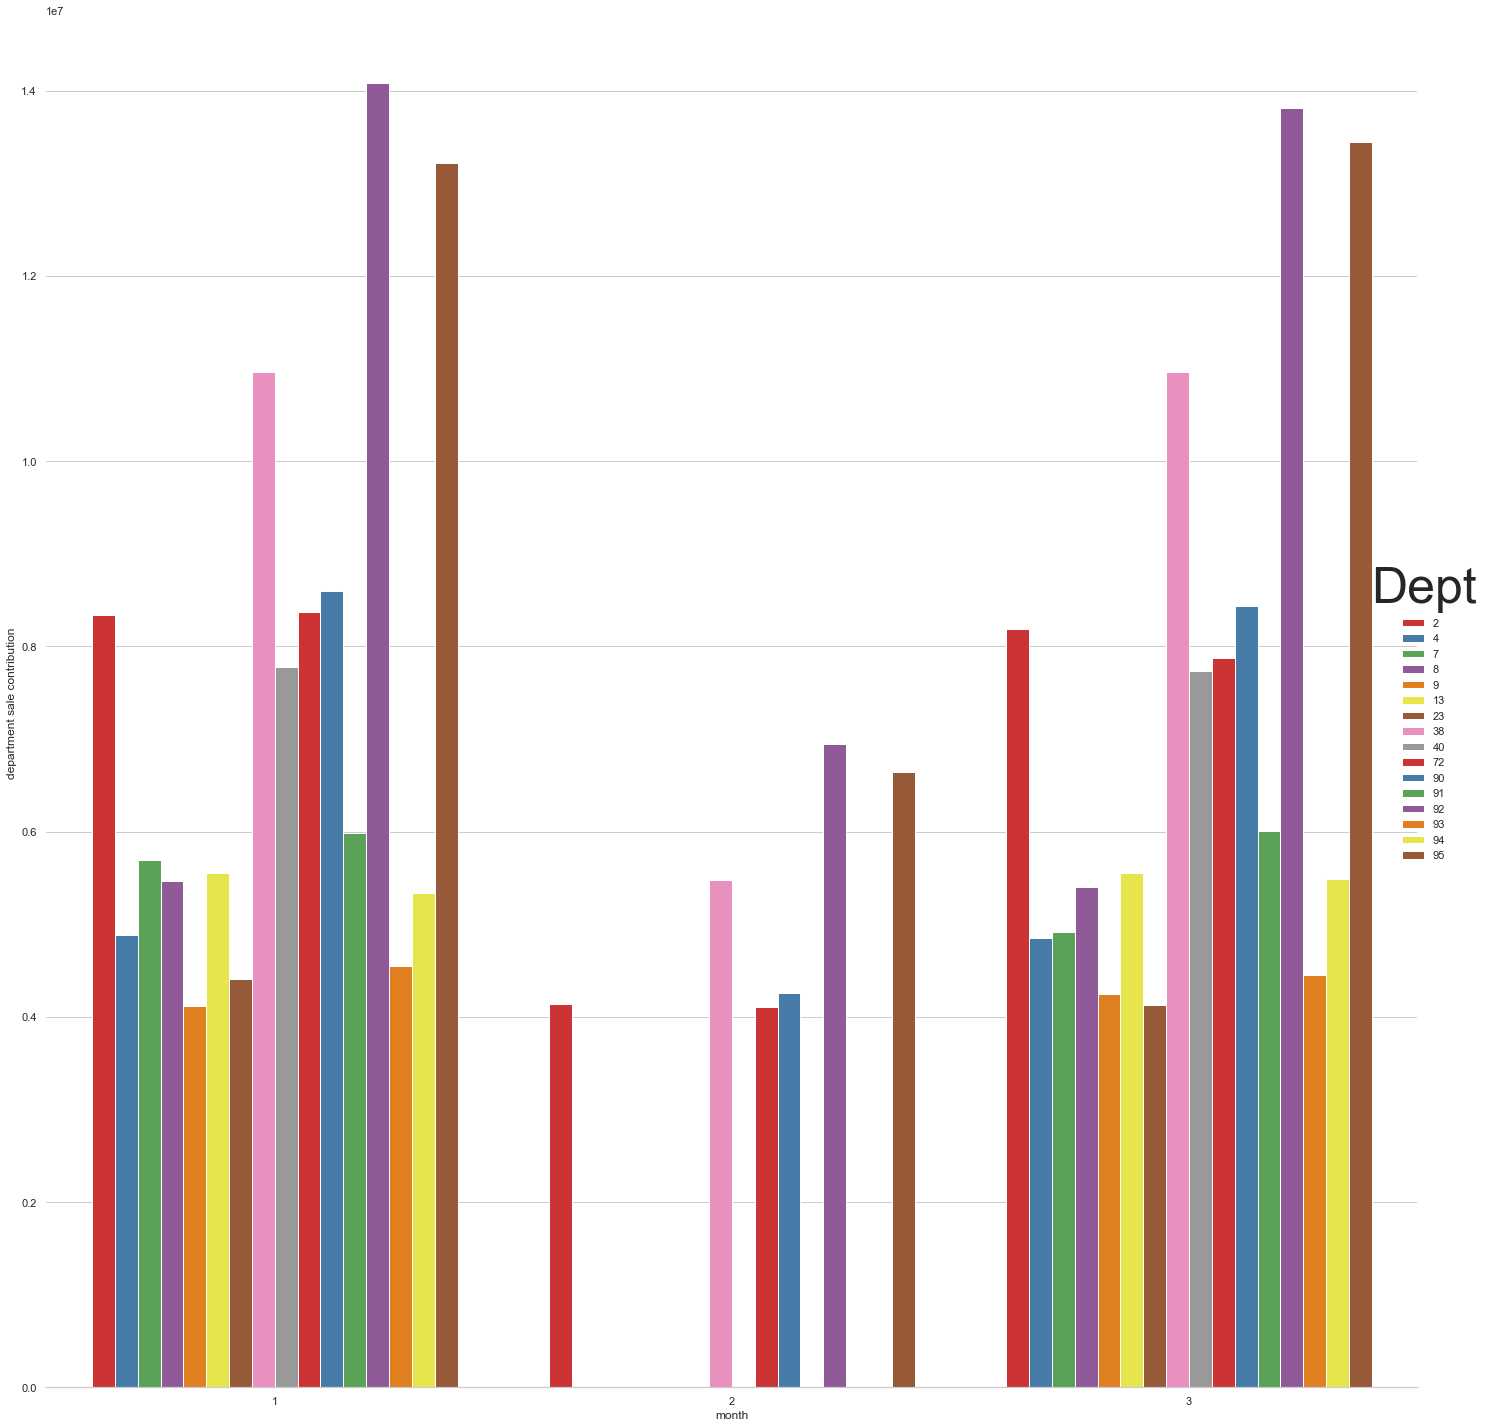

In [237]:
	top_rf22 = top_rf2.loc[top_rf2['month'] <= 3 ]


sns.set(style="whitegrid")
	g = sns.factorplot(x="month", y="Weekly_Sales", hue="Dept", data=top_rf22, size=20, kind="bar", palette="Set1")
	g.despine(left=True)
g.set_ylabels("department sale contribution")

plt.setp(g._legend.get_title(), fontsize=50)







In [245]:
rf.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
IsHoliday                 bool
year                     int64
week                     int64
Type                    object
Size                     int64
IsHolidayInt             int64
Weekly_Sales           float64
dtype: object